{'第一产业': {'农、林、牧、渔服务业': {'农、林、牧、渔服务业': {'weight': 1.586}, '农业': {'weight': 27.815}, '林业': {'weight': 0.846}, '渔业': {'weight': 4.562}, '畜牧业': {'weight': 8.981}}}, '第三产业': {'交通运输、仓储和邮政业': {'仓储业': {'weight': 2.198}, '水上运输业': {'weight': 1.191}, '管道运输业': {'weight': 0.006}, '航空运输业': {'weight': 0.34}, '装卸搬运和运输代理业': {'weight': 14.414}, '道路运输业': {'weight': 51.475}, '邮政业': {'weight': 1.784}, '铁路运输业': {'weight': 0.043}}, '住宿和餐饮业': {'住宿业': {'weight': 20.895}, '餐饮业': {'weight': 55.642}}, '信息传输、软件和信息技术服务业': {'互联网和相关服务': {'weight': 1.5}, '电信、广播电视和卫星传输服务': {'weight': 3.278}, '软件和信息技术服务业': {'weight': 251.92}}, '农、林、牧、渔服务业': {'农、林、牧、渔服务业': {'weight': 1.586}, '农业': {'weight': 27.815}, '林业': {'weight': 0.846}, '渔业': {'weight': 4.562}, '畜牧业': {'weight': 8.981}}, '制造业': {'专用设备制造业': {'weight': 24.932}, '仪器仪表制造业': {'weight': 4.556}, '其他制造业': {'weight': 0.432}, '农副食品加工业': {'weight': 11.667}, '化学原料和化学制品制造业': {'weight': 13.691}, '化学纤维制造业': {'weight': 0.117}, '医药制造业': {'weight': 6.302}, '印刷和记录媒介复制业': {'weight': 6

KeyError: 'weight'

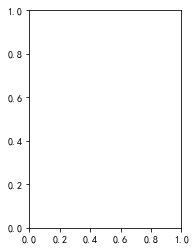

In [81]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

# nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',alpha=0.8,width=[float(v['weight']*5) for (r,c,v) in G.edges(data=True)])

def getData(fpath):
    data=pd.read_csv(fpath,encoding='utf-8_sig')
    prcData=data.drop_duplicates()
    return prcData

def to_dict_s(pseries):
    res_dict={}
    idxs=pseries.index.values
    vals=pseries.values
    for (idx,vls) in zip(idxs,vals):
#         print(type(round(vls,3)))
        res_dict[idx]=round(vls,3)
    return res_dict

def node_weight(rawData):
    hy_weight_data={}
    cy_weight_data={}
    xl_weight_data={}
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    cy_data=(rawData[u'企业数量'].groupby([rawData['产业类别']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    hy_data=(rawData[u'企业数量'].groupby([rawData['行业大类']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    xl_data=(rawData[u'企业数量'].groupby([rawData['行业小类']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    
#     hy_weight_data=to_dict_s(hy_data)
#     cy_weight_data=to_dict_s(cy_data)
#     xl_weight_data=to_dict_s(xl_data)
    cy_weight_data=dict(cy_data)
    hy_weight_data=dict(hy_data)
    xl_weight_data=dict(xl_data)
    
#     print(hy_weight_data)
    return cy_weight_data,hy_weight_data,xl_weight_data

def get_cy_data(rawData):
    total_cy_dict=defaultdict(dict)
    total_dl_dict=defaultdict(dict)
    
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    hy_grpData=rawData[u'企业数量'].groupby([rawData['行业大类'],rawData['行业小类']])

    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    for (dl,xl),val in hy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,3)
        total_dl_dict[dl][xl]=tem_dict
#         total_dl_dict[dl]['weight']=hy_weight_data[dl]
        del tem_dict
        
    cy_grpData=rawData[u'企业数量'].groupby([rawData['产业类别'],rawData['行业大类']])
    for (cy,cdl),val in cy_grpData:
#         total_cy_dict[cy]['weight']=cy_weight_data[cy]
        total_cy_dict[cy][cdl]=total_dl_dict[cdl]
#     print(total_cy_dict)
    return total_cy_dict,total_dl_dict

def create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data):
    G=nx.from_dict_of_dicts(total_cy_dict)
    print(G.adj)
    pos=nx.spiral_layout(G)
#     nx.draw_networkx(G,pos,with_labels=True)
    nx.draw(G)
    H=nx.from_dict_of_dicts(total_dl_dict)
    print(H.edges(data=True))
#     print(G.edges(data=True))

    plt.subplot(1,2,1)
    nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',
                           alpha=0.8,width=[v['weight'] for (r,c,v) in G.edges(data=True)])
    plt.subplot(1,2,2)
    nx.draw(H)
    plt.axis('on')
    plt.show()


if __name__=="__main__":
    filpath=r'C:\Users\Administrator\Desktop\tpTest\hygs_qxb.csv'
    rawData=getData(filpath)
    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    total_cy_dict,total_dl_dict = get_cy_data(rawData)
    create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data)

[('交通运输、仓储和邮政业', '仓储业', {'weight': 2.198}), ('交通运输、仓储和邮政业', '水上运输业', {'weight': 1.191}), ('交通运输、仓储和邮政业', '管道运输业', {'weight': 0.006}), ('交通运输、仓储和邮政业', '航空运输业', {'weight': 0.34}), ('交通运输、仓储和邮政业', '装卸搬运和运输代理业', {'weight': 14.414}), ('交通运输、仓储和邮政业', '道路运输业', {'weight': 51.475}), ('交通运输、仓储和邮政业', '邮政业', {'weight': 1.784}), ('交通运输、仓储和邮政业', '铁路运输业', {'weight': 0.043}), ('住宿和餐饮业', '住宿业', {'weight': 20.895}), ('住宿和餐饮业', '餐饮业', {'weight': 55.642}), ('信息传输、软件和信息技术服务业', '互联网和相关服务', {'weight': 1.5}), ('信息传输、软件和信息技术服务业', '电信、广播电视和卫星传输服务', {'weight': 3.278}), ('信息传输、软件和信息技术服务业', '软件和信息技术服务业', {'weight': 251.92}), ('农、林、牧、渔服务业', '农、林、牧、渔服务业', {'weight': 1.586}), ('农、林、牧、渔服务业', '农业', {'weight': 27.815}), ('农、林、牧、渔服务业', '林业', {'weight': 0.846}), ('农、林、牧、渔服务业', '渔业', {'weight': 4.562}), ('农、林、牧、渔服务业', '畜牧业', {'weight': 8.981}), ('制造业', '专用设备制造业', {'weight': 24.932}), ('制造业', '仪器仪表制造业', {'weight': 4.556}), ('制造业', '其他制造业', {'weight': 0.432}), ('制造业', '农副食品加工业', {'weight': 11.667}), ('制造业', '化学原料和化学制品制造业', {

NetworkXError: Node '仓储业' has no position.

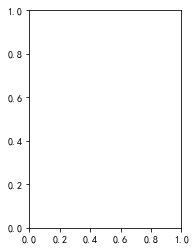

In [80]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

# nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',alpha=0.8,width=[float(v['weight']*5) for (r,c,v) in G.edges(data=True)])

def getData(fpath):
    data=pd.read_csv(fpath,encoding='utf-8_sig')
    prcData=data.drop_duplicates()
    return prcData

def to_dict_s(pseries):
    res_dict={}
    idxs=pseries.index.values
    vals=pseries.values
    for (idx,vls) in zip(idxs,vals):
#         print(type(round(vls,3)))
        res_dict[idx]=round(vls,3)
    return res_dict

def node_weight(rawData):
    hy_weight_data={}
    cy_weight_data={}
    xl_weight_data={}
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    cy_data=(rawData[u'企业数量'].groupby([rawData['产业类别']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    hy_data=(rawData[u'企业数量'].groupby([rawData['行业大类']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    xl_data=(rawData[u'企业数量'].groupby([rawData['行业小类']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    
#     hy_weight_data=to_dict_s(hy_data)
#     cy_weight_data=to_dict_s(cy_data)
#     xl_weight_data=to_dict_s(xl_data)
    cy_weight_data=dict(cy_data)
    hy_weight_data=dict(hy_data)
    xl_weight_data=dict(xl_data)
    
#     print(hy_weight_data)
    return cy_weight_data,hy_weight_data,xl_weight_data

def get_cy_data(rawData):
    total_cy_dict=defaultdict(dict)
    total_dl_dict=defaultdict(dict)
    
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    hy_grpData=rawData[u'企业数量'].groupby([rawData['行业大类'],rawData['行业小类']])

    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    for (dl,xl),val in hy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,3)
        total_dl_dict[dl][xl]=tem_dict
#         total_dl_dict[dl]['weight']=hy_weight_data[dl]
        del tem_dict
#     print(total_dl_dict)
    cy_grpData=rawData[u'企业数量'].groupby([rawData['产业类别'],rawData['行业大类']])
    
    for (cy,cdl),val in cy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,3)
        total_cy_dict[cy][cdl]=tem_dict
#         tem_dict['weight']=val.values[0]
#         total_cy_dict[cy][cdl]=tem_dict
        
#     for (cy,cdl),val in cy_grpData:
#         tem_dict={}
#         if cdl in tem_dict
#         tem_dict['weight']=round(val.values[0]/min_ptcs,3)
#         total_cy_dict[cy][cdl]=tem_dict
#         total_cy_dict[cy]['weight']=cy_weight_data[cy]
#         total_cy_dict[cy][cdl]=total_dl_dict[cdl]
#     print(total_cy_dict)
    return total_cy_dict,total_dl_dict

def create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data):
    G=nx.from_dict_of_dicts(total_cy_dict)

    pos=nx.spiral_layout(G)
#     nx.draw_networkx(G,pos,with_labels=True)
    nx.draw(G)
    H=nx.from_dict_of_dicts(total_dl_dict)
    print(H.edges(data=True))
    G.add_edges_from(H.edges(data=True))
#     print(H.edges(data=True))
#     print(G.edges(data=True))

    plt.subplot(1,2,1)
    nx.draw_networkx(G,pos,with_labels=True)
#     nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',
#                            alpha=0.8,width=[v['weight'] for (r,c,v) in G.edges(data=True)])
    plt.subplot(1,2,2)

    plt.axis('on')
    plt.show()


if __name__=="__main__":
    filpath=r'C:\Users\Administrator\Desktop\tpTest\hygs_qxb.csv'
    rawData=getData(filpath)
    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    total_cy_dict,total_dl_dict = get_cy_data(rawData)
    create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data)